# Introduction

In this project, I will be looking at using agricultureal data from the [National Institue of Statistics of Rwanda](https://microdata.statistics.gov.rw/index.php/catalog/88/get_microdata) data repository to predict crop yield in different areas.  I believe one of the most powerful and useful applications of data science is within agriculutre.  Not only does this allow for more sustainable farming which combats climate change but also address key challenges such as food scacity.  Particulary in developing countries, sustainable food production can combat poverty and lead to stablitiy within the country.  This is a summary write up of the end-to-end process.  Later on, I will had more detailed write ups of each seperate part.



In [ ]:
# folium map

## Data Engineering

Again, I got this data digging around the [National Institue of Statistics of Rwanda](https://microdata.statistics.gov.rw/index.php/catalog/88/get_microdata) data repository.  Note you will need to fill out a few forms describing why you want the data.  If you click on the "data description" tab for 2017 in the [repository](https://microdata.statistics.gov.rw/index.php/catalog/88/data_dictionary), we see that we get a wide range of data from fertilizer to crop production to pesticides information.  We also see that the data is divided into three seasons(A,B,C) and small/large scale farms.  In this first attempt, we will be looking at crop production and fertilizer data from season A and only for large scale farms during 2017.  Crop production will have information about our target variable (yield) and after some reading, fertilizer also seems to play a crucial role.  In the later attempts, we can expand to other seasons, datasets, and farm types, but for now we are going to start small and try to extract immediate value.  Finally, once a general pipeline is created, going back and adding additional data should have less overhead.

We'll first import all the important libraries.  These were added as they were needed during the project.  Note, there is a custom library `Aggro_DE` which is a toolkit I wrote to help process the data and reduce the amount of repeated code.  

In [2]:
import pandas as pd  
import Aggro_DE as AgDE 

To begin with, we can download the `SeasonA_2017_LSF_Crop production.dta` and `SeasonA_2017_LSF_Fertilizers.dta` files to a local folder.  If you load in this data, you'll notice that the column names are codes that don't mean anything.  

In [4]:
raw_data = pd.read_stata("raw_data/SeasonA_2017_LSF_Crop production.dta")
raw_data.head(3)

,LSF_ID,s1q1,s1q2,s2q1,s2q2,s2q4,s2q5,s2q6,s2q7,s2q8,...,s2q17,s2q18,s2q19,s2q20,s2q21,s2q22,s2q23,s2q24,s2q25,crop_group
0,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Soybean,3649.435547,NaN,...,23.0,5750.0,RAB/NAEB/SECTOR,0.0,140.0,140.0,Diseases and pasts,No,NaN,Soybean
1,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Tree tomato,1824.717773,NaN,...,NaN,NaN,NaN,50.0,0.0,50.0,Good harvest as it was expected,Yes,900.0,Fruits
2,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Cooking banana,1642.246094,43.0,...,NaN,0.0,RAB/NAEB/SECTOR,600.0,300.0,900.0,Good harvest as it was expected,No,NaN,Cooking banana


Digging a little bit deeper into the repository, I found that the column names were listed for each data set in a PDF (example below).  Thus, I created excel documents with the column code and the respective column name (second figure below)

#### Add Images
#### Add Images


I then wrote a function int he `Aggro_DE` to link the excel document column names key to the actual dataset.  An example is shown below using the crop production data:

In [6]:
crop_production_data_names = "SeasonA_2017_LSF_Crop production"
crop_production_var_names = "2017_LSF_crop_production_var"

crop_production = AgDE.label_data(crop_production_data_names, crop_production_var_names)

crop_production.head()

,LSF_ID,Province,District,Plot No,Plot area(m^2),Cropping_System,Crops_In_Plot,crop_name,crop area (m2),number trees,...,quanitiy improved seeds purchased,improved seeds price,improved seeds origin,quanitiy harvested (kg),remaining harvested,total harvested,Production Status,Produce sold,farm gate price of crop,crop_group
0,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Soybean,3649.435547,NaN,...,23.0,5750.0,RAB/NAEB/SECTOR,0.0,140.0,140.0,Diseases and pasts,No,NaN,Soybean
1,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Tree tomato,1824.717773,NaN,...,NaN,NaN,NaN,50.0,0.0,50.0,Good harvest as it was expected,Yes,900.0,Fruits
2,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Cooking banana,1642.246094,43.0,...,NaN,0.0,RAB/NAEB/SECTOR,600.0,300.0,900.0,Good harvest as it was expected,No,NaN,Cooking banana
3,12001.0,Kigali,Gasabo,1.0,5474.153809,Mixed,4.0,Dessert banana,821.123047,20.0,...,NaN,0.0,RAB/NAEB/SECTOR,250.0,50.0,300.0,Good harvest as it was expected,No,NaN,Dessert banana
4,12001.0,Kigali,Gasabo,2.0,43546.945312,Pure,1.0,Napia grass for fodder,43546.945312,NaN,...,NaN,NaN,NaN,32000.0,7200.0,39200.0,Good harvest as it was expected,No,NaN,Other crops


I then performed the usual checks on the data such as looking for missing values, outliers, and mix data types (strings in a numerical column)  Again, in later posts, I will go step by step into how I delt with these repective issues.  One thing to call out is that in columns that have categorical data such as "improved seeds origin" there are `NaN`s rather that something like a "N/A" option.  Thus, in such a case I added an additional category "N/A_improved seeds origin" using the code below:

In [8]:
print("Below adding N/A Category")
print(crop_production["improved seeds origin"].value_counts())

add_category = "N/A_improved seeds origin"

crop_production["improved seeds origin"] = crop_production["improved seeds origin"].cat.add_categories([add_category])
crop_production["improved seeds origin"][crop_production["seeds type"] == "Traditional seeds"] = add_category


print("After adding N/A Category")
print(crop_production["improved seeds origin"].value_counts())

Below adding N/A Category
RAB/NAEB/SECTOR                    155
Shops of improved seeds            110
Recognized seed multipliers/NGO    104
Other (Specify)                     21
Name: improved seeds origin, dtype: int64
After adding N/A Category
N/A_improved seeds origin          351
RAB/NAEB/SECTOR                    155
Shops of improved seeds            110
Recognized seed multipliers/NGO    104
Other (Specify)                     21
Name: improved seeds origin, dtype: int64


Below is a sample of the cleand up dataset after saving it to a seperate folder

In [14]:
cleaned_production_data = pd.read_csv("cleaned_data/MD_SeasonA_2017_LSF_Crop production.csv")
cleaned_production_data.head()

,Unnamed: 0,LSF_ID,Province,District,Plot No,Plot area(m^2),Cropping_System,Crops_In_Plot,crop_name,crop area (m2),seeds type,quantity seeds sown,quanitiy improved seeds,quanitiy harvested (kg),total harvested,crop_proportion
0,0,12001.0,Kigali,Gasabo,1.0,5474.154,Mixed,4.0,Soybean,3649.43550,Improved seeds,0.0,23.0,0.0,140.0,0.666667
1,1,12001.0,Kigali,Gasabo,1.0,5474.154,Mixed,4.0,Tree tomato,1824.71780,Traditional seeds,0.0,0.0,50.0,50.0,0.333333
2,2,12001.0,Kigali,Gasabo,1.0,5474.154,Mixed,4.0,Cooking banana,1642.24610,Improved seeds,0.0,0.0,600.0,900.0,0.300000
3,3,12001.0,Kigali,Gasabo,1.0,5474.154,Mixed,4.0,Dessert banana,821.12305,Improved seeds,0.0,0.0,250.0,300.0,0.150000
4,4,12001.0,Kigali,Gasabo,2.0,43546.945,Pure,1.0,Napia grass for fodder,43546.94500,Traditional seeds,0.0,0.0,32000.0,39200.0,1.000000


I can then load in the fertilizer data using the same function from the `Aggro_DE` library.  

In [11]:
fertilizer_data_names = "SeasonA_2017_LSF_Fertilizers"
fertilizer_var_names = "2017_LSF_fertilizers_var"

fertilizer_data = AgDE.label_data(fertilizer_data_names, fertilizer_var_names)
fertilizer_data.head()

,LSF_ID,Province,District,Plot No,Plot area(m^2),Organic fertilizer,organic fertilizer used (kg),organic fertilizer purchased (kg),organic fertilizer cost,inorganic fertilizer,inorganic fertilizer type,inorganic fertilizer unit,inorganic fertilizer used (kg),inorganic fertilizer purchased (kg),inorganic fertilizer cost,source inorganic fertilizer,crop inorganic fertilizer
0,12001.0,Kigali,Gasabo,1.0,5474.153600,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12001.0,Kigali,Gasabo,2.0,43546.943029,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12001.0,Kigali,Gasabo,3.0,37865.134384,Yes,10000.0,5000.0,80000.0,Yes,DAP,Kg,118900.0,290.0,410.0,Government(MINAGRI/RAB/NAEB/District,Maize for fodder
3,12001.0,Kigali,Gasabo,4.0,30846.701651,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12001.0,Kigali,Gasabo,5.0,44567.784086,Yes,5000.0,5000.0,60000.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I then applied the same data checks as before and again will dive deeper into that workflow in another post.  Beyond these usual checks, I wanted to make sure I was capturing how much of each type of inorganic fertilizer was being used.  Thus, I turned the "inorganic fertilizer type" into dummie columns and multipled those columns by the "inorganic fertilizer used (kg)" column.  Below is a sample of the cleaned up organic and inorganic data.  I split this fertilizer data up in this way in order to make merging easier.

In [16]:
cleaned_Ofertilizer_data = pd.read_csv("cleaned_data/MD_SeasonA_2017_LSF_OrganicFertilizers.csv").iloc[:,1:]
cleaned_Ofertilizer_data.head()

,LSF_ID,Province,District,Plot No,Plot area(m^2),Organic fertilizer,organic fertilizer used (kg),inorganic fertilizer,inorganic fertilizer type,inorganic fertilizer used (kg),source inorganic fertilizer
0,12001.0,Kigali,Gasabo,1.0,5474.153600,0,0.0,0,N/Ainorganic fertilizer type,0.0,N/Asource inorganic fertilizer
1,12001.0,Kigali,Gasabo,2.0,43546.943029,0,0.0,0,N/Ainorganic fertilizer type,0.0,N/Asource inorganic fertilizer
2,12001.0,Kigali,Gasabo,3.0,37865.134384,1,10000.0,1,DAP,118900.0,Government(MINAGRI/RAB/NAEB/District
3,12001.0,Kigali,Gasabo,4.0,30846.701651,0,0.0,0,N/Ainorganic fertilizer type,0.0,N/Asource inorganic fertilizer
4,12001.0,Kigali,Gasabo,5.0,44567.784086,1,5000.0,0,N/Ainorganic fertilizer type,0.0,N/Asource inorganic fertilizer


In [18]:
cleaned_IOfertilizer_data = pd.read_csv("cleaned_data/MD_SeasonA_2017_LSF_Inorganic_Fertilizers.csv").iloc[:,1:]
cleaned_IOfertilizer_data.head(10)

,LSF_ID,Province,District,Plot No,Plot area(m^2),Organic fertilizer,organic fertilizer used (kg),inorganic fertilizer,crop_name,DAP,N/Ainorganic fertilizer type,NPK 17-17-17,Urea,Lliquid urea,Other inorganic fertilizer (to specify),NPK 20-10-10,KCL/MOP,NPK 25-5-5
0,12001.0,Kigali,Gasabo,3.0,37865.134384,1,10000.0,1,Maize for fodder,118900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12001.0,Kigali,Gasabo,6.0,43255.799107,1,25000.0,1,Maize,137350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12001.0,Kigali,Gasabo,8.0,169087.335806,1,92000.0,1,Maize,5494.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12001.0,Kigali,Gasabo,29.0,57698.689044,1,15000.0,1,Maize for fodder,435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12001.0,Kigali,Gasabo,30.0,65585.026222,1,17500.0,1,Maize for fodder,207870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12001.0,Kigali,Gasabo,32.0,3761.818039,1,1000.0,1,Maize for fodder,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12001.0,Kigali,Gasabo,33.0,5528.747535,1,1300.0,1,Maize for fodder,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12002.0,Kigali,Gasabo,5.0,242249.752812,1,7230.0,1,Maize,1482150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12003.0,Kigali,Gasabo,8.0,105113.149787,1,420400.0,1,Maize for fodder,0.0,0.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0
9,12003.0,Kigali,Gasabo,9.0,92874.042231,1,371600.0,1,Maize for fodder,0.0,0.0,663.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merging the Data Together

I then merged the crop production, organic/inorganic fertilizer data together on the "lsf_id", "province", "district", "plot_no", "crop_name" columns.  Additionally, I used a function from the `Aggro_DE` library to detect which columns are categorical and, make dummie columns out of those categories, delete the origninal column, and append the dummie columns.  Below is an example of the final dataset we are going to train the model on.

In [20]:
model_data = pd.read_csv("cleaned_data/MD_SeasonA_2017_fertilizer_crop_production.csv").iloc[:,1:]
model_data.head()

,lsf_id,plot_no,plot_area(m^2)_x,crops_in_plot,quantity_seeds_sown,quanitiy_improved_seeds,quanitiy_harvested_(kg),total_harvested,crop_proportion,organic_fertilizer_used_(kg)_x,...,Sugar beet,Sweet pepper,Sweet potato,Taro,Tomato,Tree tomato,Wheat,Both(Trad and Improved,Improved seeds,Traditional seeds
0,12001.0,1.0,5474.154,4.0,0.0,23.0,0.0,140.0,0.666667,0.0,...,0,0,0,0,0,0,0,0,1,0
1,12001.0,1.0,5474.154,4.0,0.0,0.0,50.0,50.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
2,12001.0,1.0,5474.154,4.0,0.0,0.0,600.0,900.0,0.300000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,12001.0,1.0,5474.154,4.0,0.0,0.0,250.0,300.0,0.150000,0.0,...,0,0,0,0,0,0,0,0,1,0
4,12001.0,2.0,43546.945,1.0,0.0,0.0,32000.0,39200.0,1.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


## Model Building

Okay so now we have our nice clean dataset.  Here, we have the "quanitiy_harvested_(kg)" column as our target variable and mostly everything else as our features.  Some columns such as "lsf_id" will be dropped as they were just being used to merge data on.  The first step is to perform some exploritory data analysis to get a sense of what we are working with.  Right away if we plot our target variable in a histogram, we find that there are lots of zeros.

0.0         215
2000.0       10
600.0         7
100.0         7
500.0         6
           ... 
932405.0      1
282.0         1
2256.0        1
195.0         1
224616.0      1
Name: quanitiy_harvested_(kg), Length: 380, dtype: int64


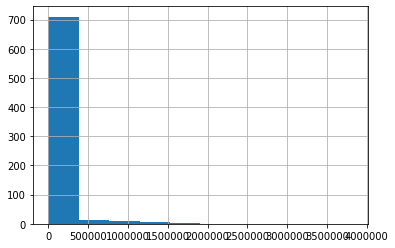

In [25]:
print(model_data["quanitiy_harvested_(kg)"].value_counts())
model_data["quanitiy_harvested_(kg)"].hist()

This is what's known as "zero-inflated data" which a whole research field on its own.  This inflation is probamatic because a lot of models assume that the target dataset has close to a gaussian distribution.  We can deal with this in a number ways:

* First us a classification model then regression model
* Perform some sort of transformation (log, yeo-johnson) on the data to reduce the skew

After doing some iterating on my own, I decided to first do a 